# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

Zoe Gates, gzp2eu, Q1, Q2, Q7

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

#### Answer ####
1. A model is made linear by its weights. If the model takes on this form y=w⊤x+b regardless of the form the input is in, it's linear. It needs to be linear in w and b, the intercept. Even if x is raised to a power other than one, a model can be lienar.
2. The coefficient means different things depending on how the intercepts/dummy variables were handled. If one wants to know the value associated exactly with each of the variables, one should drop the intercept column. If one wants to know the coefficient value in relation to a baseline category, one should keep the intercept and drop the variable. If the first method is used, the coefficient is the value directly associated with the variable it is being multiplied by, otherwise it's the difference of the variable in the associated category versus the one dropped.
3. Yes, it can be used. The linear model is actually a very refined way of classifying outcomes because it weighs specific explanatory variables.
4. A sign that the linear model is over-fitting is when it's using too many explanatory variables. This could be a sign that it's using unrelated cases to predict outcomes. This would result in little error in the training data, and a large test error.
5. Multi-colinearity refers to high correlation between two explanatory variables. This can create unstable estimates and lack of differentiation between variables. Taking an instrumental variable, or a variable that is known not to be correlated with the error term, then predicting the values of the problematic variable by regressing them on the IV, and then using these X^ (hats) to regress the ultimate variable on interest on the cleaned explanatory variables reduces this messy interdependence that we know as multi-colinearity.
6. Non-linear coefficients can simply be denoted by a letter term (that represents something non-linear). The model can be made linear even though the underlying relationships are transformed in some non-linear manner.
7. The intercept is the expected value of the variable we are predicting when the weights of the explanatory variables are 0. It's a baseline before any explanatory variables take effect. A slope coefficients explains change in the value we are predicting when there is a 1 unit increase in x (of the specific explanatory variable). In linear regression, this is the weight. The coefficient for dummy variables means different things depending on how the multi-colinearity is handled, but we interpret it as either the direct value/weight, or the different in relation to the weight of the category dropped- the baseline)

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [6]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
#Loading the data
data= pd.read_csv("https://raw.githubusercontent.com/ds4e/linearModels/refs/heads/main/data/Q1_clean.csv")

In [8]:
data #Checking the data

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt
...,...,...,...,...,...
22148,90,100.0,Manhattan,Apartment,Entire home/apt
22149,65,80.0,Brooklyn,Apartment,Private room
22150,55,100.0,Brooklyn,Loft,Shared room
22151,60,100.0,Brooklyn,Apartment,Private room


In [9]:
print(data.columns.tolist()) #Checking the columns in the dataset

['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type', 'Room Type']


In [10]:
borough_avg_price = data.groupby('Neighbourhood ')['Price'].mean() #Finding the average price of renting a property in each neighbourhood

# Find the most expensive borough
most_expensive_borough = borough_avg_price.idxmax() #Finding the most expensive neighbourhood on average
highest_avg_price = borough_avg_price.max() #Finding that price
print(most_expensive_borough)
print(highest_avg_price)

Manhattan
183.6642863215166


In [11]:
borough_avg_price #Looking at all of the neighbourhoods

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

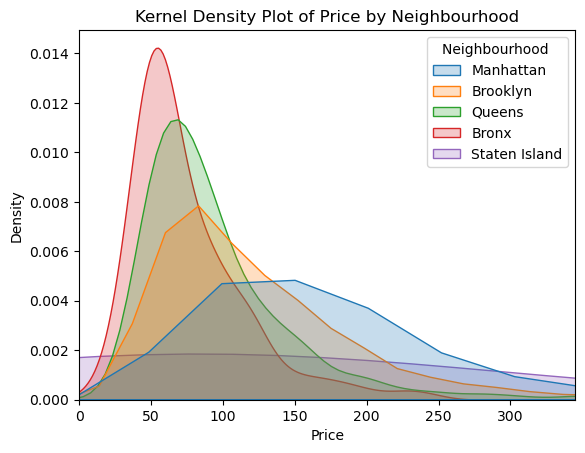

In [12]:
#Creating KDE of price by neighbourhood
sns.kdeplot(data=data, x='Price', hue='Neighbourhood ', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, data['Price'].quantile(0.95))  # Limiting x-axis to reduce extreme values and be able to helpfully visualize the data
plt.show()

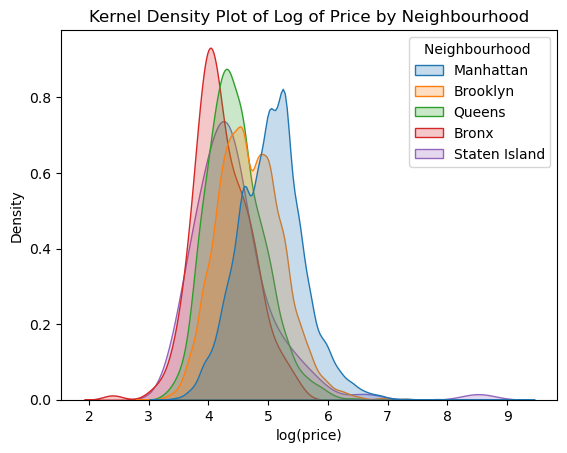

In [13]:
#Creating KDE plot of log of price and grouping by borough
data['log_price'] = np.log1p(data['Price'])
sns.kdeplot(data=data, x='log_price', hue='Neighbourhood ', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Log of Price by Neighbourhood')
plt.xlabel('log(price)')
plt.ylabel('Density')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression #Importing Linear Regression from SciKit
dummies = pd.get_dummies(data['Neighbourhood '], drop_first=False) #One-hot encoding the Neighbourhood column
dummies

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,False,False,True,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
22148,False,False,True,False,False
22149,False,True,False,False,False
22150,False,True,False,False,False
22151,False,True,False,False,False


In [15]:
X = dummies  #Defining the variables
y = data['Price']
model = LinearRegression(fit_intercept=False) #No intercept
model.fit(X, y) #Fitting the model

LinearRegression(fit_intercept=False)

In [16]:
coefficients = pd.Series(model.coef_, index=X.columns) #Getting the coefficients
print(coefficients)

Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64


2. The table of averages is exactly the same as the coefficients that we calculated by regressing price on neighbourhood (dummy data). This makes sense since the linear model is predicting one coefficient per neighbourhood- since we have no intercept and don't need to drop a neighbourhood to create a refence. Naturally, the best value for this relationship will be the average price of housing in each neighbourhood. Regressing a continuous value on a categorical one, will therefore yield coefficients that are the averages of y- the continuous category (grouped by categorial variable).

In [18]:
dummies_ni= pd.get_dummies(data['Neighbourhood '], drop_first=True) #One-hot encoding but dropping the first category in order to maintain an intercept
X = dummies_ni #Defining the variables
y = data['Price']
model = LinearRegression(fit_intercept=True) #Defining the model, intercept=True
model.fit(X, y) #Fitting the model

LinearRegression()

In [19]:
coefficients = pd.Series(model.coef_, index=X.columns) #Collecting the coefficients
print(coefficients)
intercept = model.intercept_ #Getting the intercept value from our model
print(intercept)

Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64
75.27649769585324


3. When including an intercept, a category must be dropped during the creation of dummy variables. We did this by including the argument drop_first=True. This dropped the Bronx and thus our intercept became the value of the average house in the Bronx, intercept = 75.2764977. These coefficients are the differences between one neighbourhood's average price and the average price of the Bronx. The coefficients from part 2 can be retrieved by adding the intercept to each of these coefficients (since they are differences). This second method allows us to see average prices relative to one category, and can be helpful in this respect.

#### Train_Test Split and Running Linear Regression ####

In [22]:
from sklearn.model_selection import train_test_split #Importing necessary tools for train_test splitting from scikit
from sklearn.metrics import mean_squared_error, r2_score #Importing necessary tools for mean squared error and R^2

In [23]:
data_clean = data[['Price', 'Review Scores Rating', 'Neighbourhood ']].dropna() #Dropping na's from our categories of interest
data_dummies = pd.get_dummies(data_clean, columns=['Neighbourhood '], drop_first=False)
data_dummies #Printing data_dummies to ensure that everything went smoothly

,Price,Review Scores Rating,Neighbourhood _Bronx,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island
0,549,96.0,False,False,True,False,False
1,149,100.0,False,True,False,False,False
2,250,100.0,False,False,True,False,False
3,90,94.0,False,True,False,False,False
4,270,90.0,False,False,True,False,False
...,...,...,...,...,...,...,...
22148,90,100.0,False,False,True,False,False
22149,65,80.0,False,True,False,False,False
22150,55,100.0,False,True,False,False,False
22151,60,100.0,False,True,False,False,False


In [24]:
X = data_dummies.drop('Price', axis=1) #Dropping price as explanatory variable, since we are trying to "explain" the price of the housing
y = data_dummies['Price'] #Setting the y (outcome) as price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65) #Train_test splitting the data, setting the test size to 20

In [26]:
model = LinearRegression(fit_intercept=False) #Establishing the linear model
model.fit(X_train, y_train) #Fitting the model

LinearRegression(fit_intercept=False)

In [27]:
y_pred = model.predict(X_test) #Predicting the prices based on the test data using our fit model

In [28]:
coefficients = pd.Series(model.coef_, index=X.columns) #Getting the coefficients from our fit model
review_coef = coefficients['Review Scores Rating'] #Calling for the coefficient of 'Review Scores Rating' to understand the relationship between price and rating
review_coef 

1.016095863751632

In [29]:
r2 = r2_score(y_test, y_pred) #Getting the R^2 value to see how well the model explains the variance
print(r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Getting the root mean squared error (derived from residual error)
print(rmse)

0.029117109332052915
194.0474943299375


In [30]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']) #Getting the coefficients from our model
coefficients

,Coefficient
Review Scores Rating,1.016096
Neighbourhood _Bronx,-17.990354
Neighbourhood _Brooklyn,33.192821
Neighbourhood _Manhattan,89.938768
Neighbourhood _Queens,3.694639
Neighbourhood _Staten Island,65.146603


In [31]:
#Using the predicted values of price by the model to determine which property type would be most expensive to rent
test_data = X_test.copy() #Copying the test data x (we can't use original data due to train_test_split)
test_data= X_test.merge(data[['Property Type']], left_index=True, right_index=True) #Joining the data (merge) in order to include property type (so we can group by this variable)
test_data['Predicted Price'] = y_pred #Including the predicted prices as a column
property_type = test_data.groupby('Property Type')['Predicted Price'].mean()  #Grouping average price by property type
most_expensive_property_type = property_type.idxmax() #Identifying the most expensive property type
highest_predicted_price = property_type.max() #Identifying the price
print(most_expensive_property_type)
print(highest_predicted_price)

Apartment
156.9017999774518


In [32]:
data_clean1 = data[['Price', 'Review Scores Rating', 'Neighbourhood ','Property Type']].dropna() #Cleaning the data for our next model, including Property Type
data_dummies1 = pd.get_dummies(data_clean1, columns=['Neighbourhood ','Property Type'], drop_first=False) #One-hot encoding both categorical variables
data_dummies1

,Price,Review Scores Rating,Neighbourhood _Bronx,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Boat,...,Property Type_Condominium,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa
0,549,96.0,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,149,100.0,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,250,100.0,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,90,94.0,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,270,90.0,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,90,100.0,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
22149,65,80.0,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
22150,55,100.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
22151,60,100.0,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
X = data_dummies1.drop('Price', axis=1) #Dropping price as explanatory variable, since we are trying to "explain" the price of the housing
y = data_dummies1['Price'] #Setting the y (outcome) as price

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65) #Train_test splitting the data, setting the test size to 20

In [35]:
model = LinearRegression(fit_intercept=False) #Establishing the linear model
model.fit(X_train, y_train) #Fitting the model

LinearRegression(fit_intercept=False)

In [36]:
y_pred = model.predict(X_test) #Using the model to predit prices

In [37]:
coefficients = pd.Series(model.coef_, index=X.columns) #Getting the coefficients from our fit model
review_coef = coefficients['Review Scores Rating'] #Calling for the coefficient of 'Review Scores Rating' to understand the relationship between price and rating
review_coef 

1.0022207483987395

In [38]:
print(coefficients) #Printing the coefficients

Review Scores Rating               1.002221
Neighbourhood _Bronx             -35.228208
Neighbourhood _Brooklyn           22.467930
Neighbourhood _Manhattan          84.234786
Neighbourhood _Queens             -8.584434
Neighbourhood _Staten Island      40.307016
Property Type_Apartment            5.308304
Property Type_Bed & Breakfast    -30.638226
Property Type_Boat                61.698439
Property Type_Bungalow            32.876794
Property Type_Cabin               40.482729
Property Type_Camper/RV           -9.612582
Property Type_Castle             -34.456861
Property Type_Chalet             -22.687784
Property Type_Condominium        107.793596
Property Type_Dorm               -43.249811
Property Type_House               36.413342
Property Type_Hut               -128.443536
Property Type_Lighthouse         -83.690005
Property Type_Loft                68.132865
Property Type_Other               50.528956
Property Type_Townhouse           83.562549
Property Type_Treehouse         

In [39]:
r2 = r2_score(y_test, y_pred) #Getting the R^2 value to see how well the model explains the variance
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Getting the root mean squared error (derived from residual error)
print(r2)
print(rmse)

0.0334068421154583
193.61833164635303


In [40]:
X_test['Predicted Price'] = y_pred #Adding predicted price as a column to X_test

# Merge the 'Property Type' from the original dataset with the test data
test_data= X_test.merge(data[['Property Type']], left_index=True, right_index=True) #Merging the property type from data in order to group by (into df test_data)

# Group by 'Property Type' and find the mean predicted price for each property type
property_type = test_data.groupby('Property Type')['Predicted Price'].mean() #Grouping average predicted prices by Property Type

# Find the property type with the highest predicted price
most_expensive_property = property_type.idxmax() #Identifying the most expensive property type
highest_predicted_price = property_type.max() #Identifying its price
print(most_expensive_property)
print(highest_predicted_price)

Condominium
254.18444684267783


6. The coefficient decreased from 4 to 5. This makes sense because in 5 we introduced another explanatory variable. After the introduction of property type, it is possible that the relationship between Review Score Rating and price becomes weaker. This can be true because of multi-colinearity in action. It would make that sense that Review Score Rating would have some correlation with property type. Typically, larger, more luxurious properties would received higher ratings. It is impossible to ensure that these variables are completely independent from one another.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

#### Answer ####
1. b* will be large when covariance between X and Y (which is essentially the numerator) is large. This means that the X and Y variables are highly correlated with each other. If they both increase together, this relationship will be strong and positive leading to a large slope. At the same time, if they correlate negatively (go in opposite directions, but strongly related), we will have a large but negative slope. b* will be small when the variance of x (or the denominator is large) or the covariance between X and Y is small. Low level of variance in X means the values are concentrated around the mean.
2. The intercept of a model can be affected. The equation for intercept is technically a* = ybar-b* xbar. The b* coefficient shrinks because of all of the noise around X (the denominator in the equation invcreases), and then the intercept a* shifts up accordingly. In a noiseless model, the variance would be lower, and thus the b* coefficient will be higher. This affects the weights, and makes the explanatory variable that b* is associated with weigh less in the model. This leads to underfitting.
3. Despite the fact that the noise is just measurement error or lazy data, it still has the ability to affect our model. This is because it affects the slopes that are calculated for each variable, even if this is independently, without pattern. The random noise can cause more variance and make the prediction of the relationship between X an Y worse. The increase in variance will decrease b* and underestimate the weight of explanatory variables in the model. It's important to note that this noise is not systematic, it doesn't follow a pattern, but is due to random human error. As a result, it'll preserve the overall relationship, just not quite accurately capture it's weight.
4. Attenuation can impact the precision of the estimate of the relationship between two variables. In general, the relationships are maintained, evven with this noise. This is where the trade offs come in. If the specifics and precise weights associated with explanatory variables are important, it may be well worth it to gather high quality data or clean it more carefully. Of course these things take time and resources, which may not be worth using if the specifics of the model are not that important. If someone wants a general idea of what is going on, and isn't looking closely at b* or intercepts, then it isn't worth the cost to avoid attenuation sometimes.

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
